In [283]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import re
import lxml
import numpy as np
import requests
from bs4 import BeautifulSoup

In [284]:
cd

C:\Users\Hassan


In [285]:
cd Desktop/ironhack/Projects/project-2-pipelines/

C:\Users\Hassan\Desktop\ironhack\Projects\project-2-pipelines


In [286]:
#
#Will be comparing Premier League Players stats with their stats in FIFA 22
#Will be webscraping from this website https://sofifa.com/players

In [287]:
df = pd.read_csv("data/Football Players Stats (Premier League 2021-2022).csv", encoding='Latin' )

In [288]:
df

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,Christian Marques,Wolverhampton Wanderers,ch SUI,DF,18.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,Yerson Mosquera,Wolverhampton Wanderers,co COL,DF,20.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,Louie Moulden,Wolverhampton Wanderers,eng ENG,GK,19.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689,Dion Sanderson,Wolverhampton Wanderers,eng ENG,DF,21.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
df.dropna(subset='Gls', inplace=True)
df

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,Luke Cundle,Wolverhampton Wanderers,eng ENG,MF,19.0,4,2,180,2.0,0.0,...,0.00,0.0,0.0,0.2,0.2,0.00,0.12,0.12,0.00,0.12
679,Chiquinho,Wolverhampton Wanderers,pt POR,"DF,MF",21.0,8,1,208,2.3,0.0,...,1.30,0.3,0.3,0.6,0.9,0.13,0.27,0.41,0.13,0.41
680,John Ruddy,Wolverhampton Wanderers,eng ENG,GK,34.0,2,1,135,1.5,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
681,Chem Campbell,Wolverhampton Wanderers,wls WAL,MF,18.0,1,0,13,0.1,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [292]:
dftemp.isnull().sum()

Player    0
Team      0
Pos       0
Starts    0
Gls       0
Ast       0
dtype: int64

In [293]:
fifa = 'https://sofifa.com/players?type=all&lg%5B%5D=13&pn%5B%5D=25&pn%5B%5D=27&pn%5B%5D=23'
html = requests.get(fifa)
soup = BeautifulSoup(html.content, 'html.parser')

In [294]:
players = soup.findAll("td", {"class": "col-name"})

In [295]:
overall = soup.findAll("td", {"class": "col-oa"})

In [296]:
potential = soup.findAll("td", {"class": "col-pt"})

In [297]:
value = soup.findAll("td", {"class": "col-vl"})

In [298]:
wage = soup.findAll("td", {"class": "col-wg"})

In [299]:
fifahtml = requests.get(url)

In [300]:
soup = BeautifulSoup(html.content, 'html.parser')

In [301]:
fifahtml

<Response [200]>

In [302]:
players = soup.select('div.ellipsis')

In [303]:
value = soup.select("td", {"class": "col-vl"})

In [304]:
def scrape_column(obj):
    find = soup.select(obj)
    return [i.getText().strip() for i in find]

In [305]:
def generate_df(player, overall, potential, wage, value):
   
    fifa_stats = {'Player':player,
                  'Overall':overall,
                  'Potential':potential,
                  'Wage':wage,
                  'Value':value                     
}
    fifadf = pd.DataFrame(fifa_stats)
    return fifadf

In [306]:
def webscrape():
    fifa = 'https://sofifa.com/players?type=all&lg%5B%5D=13&pn%5B%5D=25&pn%5B%5D=27&pn%5B%5D=23'
    fifahtml = requests.get(fifa)
    soup = BeautifulSoup(html.content, 'html.parser')
    player = scrape_column('div.ellipsis')[::2]
    overall = scrape_column ('td.col.col-oa')
    potential = scrape_column('td.col.col-pt')
    wage = scrape_column ('td.col.col-wg')
    value = scrape_column ('td.col.col-vl')

   
    fifadf = generate_df(player,overall, potential, wage, value)
    return fifadf

In [307]:

player = soup.select('div.ellipsis')[::2]
overall = soup.select ('td.col.col-oa')
potential = soup.select('td.col.col-pt')
wage = soup.select ('td.col.col-wg')
value = soup.select ('td.col.col-vl')

print (len(player))
print (len(overall))
print (len(potential))
print (len(wage))
print (len(value))


60
60
60
60
60


In [308]:
print (player[0])
(player[0].getText().strip())

<div class="ellipsis">M. Salah</div>


'M. Salah'

In [368]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [309]:
fifadf = webscrape()

In [310]:
fifadf['Player']

0              M. Salah
1     Cristiano Ronaldo
2               S. Mané
3                H. Son
4               H. Kane
5           R. Sterling
6             R. Lukaku
7             R. Mahrez
8              J. Vardy
9            Diogo Jota
10            J. Sancho
11           K. Havertz
12              L. Díaz
13          J. Grealish
14             P. Foden
15            H. Ziyech
16            T. Werner
17             M. Mount
18             Raphinha
19        Gabriel Jesus
20         A. Lacazette
21             Coutinho
22           C. Pulisic
23            E. Cavani
24          M. Rashford
25           R. Jiménez
26              W. Zaha
27            L. Bailey
28     D. Calvert-Lewin
29          Richarlison
30     A. Saint-Maximin
31          Lucas Moura
32              D. Ings
33          S. Bergwijn
34        D. Kulusevski
35           M. Antonio
36            H. Barnes
37          W. Weghorst
38           E. Buendía
39            C. Wilson
40             J. Bowen
41          L. T

In [314]:
#make two columns one in each df
#take the last names of df and put it in that column
#then do  a join on both dataframes

In [374]:
df = pd.read_csv("data/cleanedpremdata.csv", encoding='Latin' )

In [375]:
premdf = df[['Player','Team','Starts','Min','Gls','Ast']]

In [376]:
temp = pd.merge(fifadf, premdf, how='left')

temp.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Player,M. Salah,Cristiano Ronaldo,S. Mané,H. Son,H. Kane,R. Sterling,R. Lukaku,R. Mahrez,J. Vardy,Diogo Jota,...,D. Gray,D. James,C. Wood,P. Daka,Hwang Hee Chan,I. Sarr,N. Maupay,I. Toney,D. Origi,T. Minamino
Overall,91,91,89,89,89,87,86,86,86,85,...,77,77,77,77,77,77,77,77,76,76
Potential,91,91,89,89,89,87,86,86,86,89,...,80,82,77,83,78,83,82,79,77,77
Wage,€350K,€270K,€270K,€240K,€230K,€240K,€200K,€220K,€180K,€155K,...,€68K,€62K,€45K,€78K,€65K,€45K,€52K,€49K,€88K,€88K
Value,€129M,€45M,€101M,€104M,€112M,€87M,€69.5M,€65.5M,€33M,€78M,...,€14M,€16M,€10.5M,€17M,€12.5M,€16.5M,€16M,€13.5M,€9M,€9M
Team,Liverpool,Manchester United,Liverpool,Tottenham Hotspur,Tottenham Hotspur,Manchester City,Chelsea,Manchester City,Leicester City,NaN,...,Everton,Manchester United,Newcastle United,Leicester City,NaN,Watford,Brighton & Hove Albion,Brentford,Liverpool,Liverpool
Starts,30.0,27.0,32.0,35.0,36.0,23.0,16.0,15.0,20.0,NaN,...,28.0,2.0,15.0,13.0,NaN,21.0,25.0,32.0,0.0,1.0
Min,"2,762","2,456","2,819","3,006","3,232","2,128","1,589","1,498","1,806",NaN,...,"2,338",126,"1,327","1,159",NaN,"1,861","2,276","2,909",133,186
Gls,23.0,18.0,16.0,23.0,17.0,13.0,8.0,11.0,15.0,NaN,...,5.0,0.0,2.0,5.0,NaN,5.0,8.0,12.0,3.0,3.0
Ast,13.0,3.0,2.0,7.0,9.0,5.0,0.0,5.0,2.0,NaN,...,4.0,0.0,0.0,3.0,NaN,2.0,2.0,5.0,0.0,0.0


temp.dropna(subset='Starts', inplace=True)

In [361]:
temp

,Player,Overall,Potential,Wage,Value,Team,Starts,Min,Gls,Ast
0,M. Salah,91,91,€350K,€129M,Liverpool,30.0,"2,762",23.0,13.0
1,Cristiano Ronaldo,91,91,€270K,€45M,Manchester United,27.0,"2,456",18.0,3.0
2,S. Mané,89,89,€270K,€101M,Liverpool,32.0,"2,819",16.0,2.0
3,H. Son,89,89,€240K,€104M,Tottenham Hotspur,35.0,"3,006",23.0,7.0
4,H. Kane,89,89,€230K,€112M,Tottenham Hotspur,36.0,"3,232",17.0,9.0
5,R. Sterling,87,87,€240K,€87M,Manchester City,23.0,"2,128",13.0,5.0
6,R. Lukaku,86,86,€200K,€69.5M,Chelsea,16.0,"1,589",8.0,0.0
7,R. Mahrez,86,86,€220K,€65.5M,Manchester City,15.0,"1,498",11.0,5.0
8,J. Vardy,86,86,€180K,€33M,Leicester City,20.0,"1,806",15.0,2.0
9,Diogo Jota,85,89,€155K,€78M,NaN,NaN,NaN,NaN,NaN


In [360]:
temp.describe().round(2)

,Starts,Gls,Ast
count,57.00,57.00,57.00
mean,19.44,6.96,3.72
std,9.73,5.38,3.03
min,0.00,0.00,0.00
25%,13.00,3.00,2.00
50%,20.00,5.00,3.00
75%,27.00,10.00,5.00
max,36.00,23.00,13.00


temp

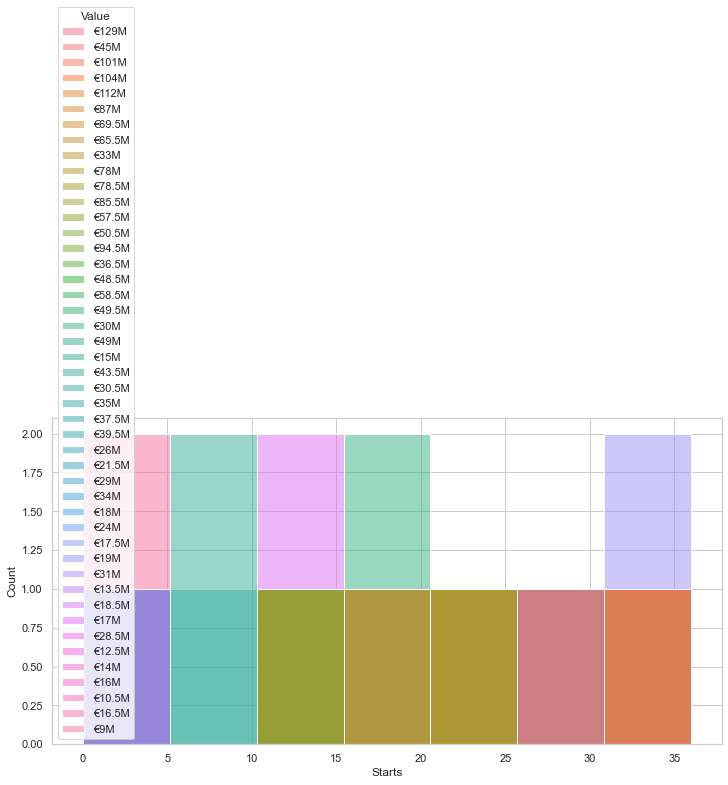

In [377]:
fig1 = sns.histplot(data=temp, x="Starts", hue="Value")

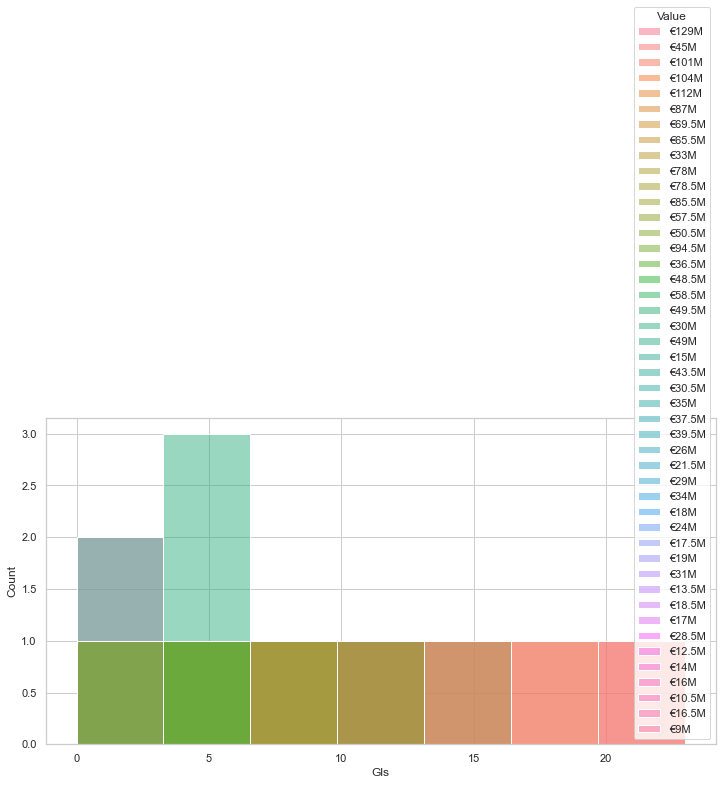

In [382]:
fig2 = sns.histplot(data=temp, x="Gls", hue="Value")

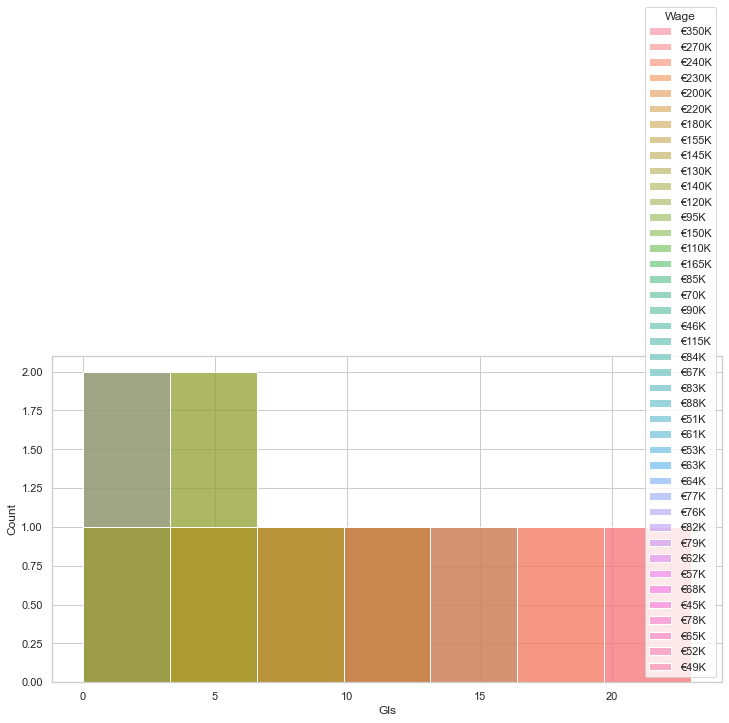

In [384]:
fig3 = sns.histplot(data=temp, x="Gls", hue="Wage")

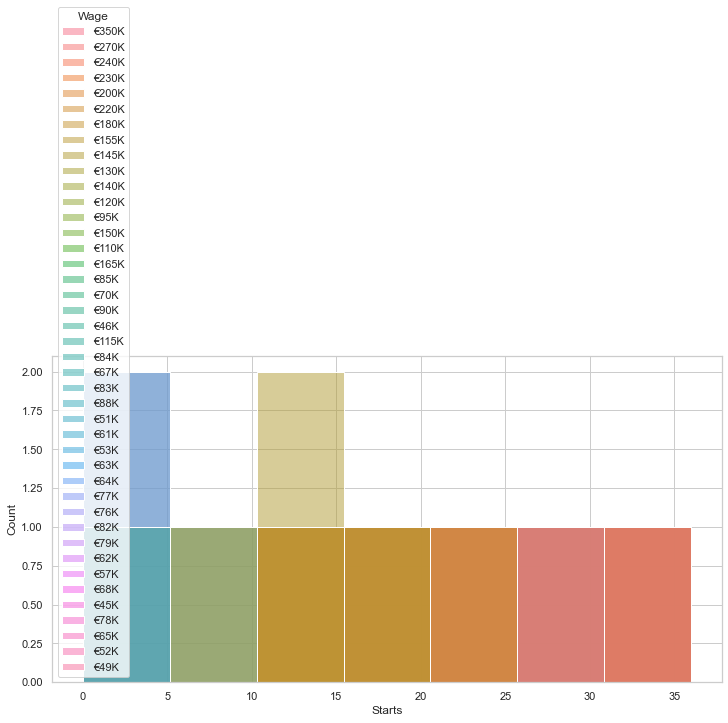

In [387]:
fig4 = sns.histplot(data=temp, x="Starts", hue="Wage")